In [4]:
pip install tweepy

In [5]:
pip install TextBlob


In [17]:
import tweepy
from textblob import TextBlob

f1 = "The Food is was very good"
f2 = "The Food is awesome"
f3 = "The Food is bad"
blob1 = TextBlob(f1)
blob2 = TextBlob(f2)
blob3 = TextBlob(f3)
print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)


Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [24]:
import tweepy
from textblob import TextBlob

consumer_key = 'ZSTjRgpSwrcpgLDqTug1tnHVS'
consumer_secret = '2mfFBHGIV0OT7b5LbgWrAbBhoyr3tB7GiGTtCGiz0pN8S9EFKv'
access_token = '1014097837381111808-1ZmyTn9NwXhnlnH3rLJdjLg7WmwFTG'
access_token_secret = 'siiC7b529NpcGT8uwopjOaauSRZoUQdlN38mLL0gX2TLK'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)
public_tweets = api.search('Siddharth Shukla')

for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)


RT @YUVSTRONG12: Saddened to hear of the untimely passing away of the young and talented Siddharth Shukla. My deepest condolences to his fa…
Sentiment(polarity=0.39999999999999997, subjectivity=0.65)
RT @Bilalpasha007: Siddharth Shukla was a only guy who spoke to me During Second Wave Regarding the Oxygen,Beds Availability in Mumbai and…
Sentiment(polarity=0.0, subjectivity=0.5)
RT @ShivAroor: BREAKING: Actor Siddharth Shukla dead after a heart attack, Mumbai’s Cooper Hospital confirms the news https://t.co/7kLO1MQK…
Sentiment(polarity=-0.2, subjectivity=0.4)
ମା’ଙ୍କ ପସନ୍ଦରେ ଅଭିନୟ ଦୁନିଆକୁ ଆସିଥିଲେ ସିଦ୍ଧାର୍ଥ, ଏହି ସିରିଏଲ୍ ଦେଇଥିଲା ପରିଚୟ #Odisha #Bhubaneswar #SidharthShukla  https://t.co/TA1Wu2o7GS
Sentiment(polarity=0.0, subjectivity=0.0)
RT @indiatvnews: BREAKING: Bigg Boss 13 winner #SidharthShukla passes away on Monday. He was 40. Siddharth, the winner of Bigg Boss 13 was…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @shreemiverma: please spare siddharth shukla's partner from the absolut

In [26]:
pip install WordCloud


In [1]:
#import library
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [9]:
#Twiiter Api 
consumer_key = 'Xc3AoX3bBdTYTbg27oQ2CRTQN'
consumer_secret = 'LevIxZ7VKDAqGtNZ1D2nLbTvnw6vvqGF6WUbAKtc0l9k1Budy6'
access_token = '799422922800635904-eo9u38Ywri0nNkwRfc8cuVcqTooMBCx'
access_token_secret = 'W0m3pTrfNcssVE2mmw1ba3wxneUnm2emcinRWXv7bzOH1'


In [10]:
#Create Authentication object 
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)



In [18]:
posts = api.user_timeline(screen_name='Crypto',count=100,lang='en',tweet_mode='extended')

#print last 5 tweets 
print("Show last 5 tweets :")

i=1
for tweet in posts[0:5]:
    print(str(i) + ')' +tweet.full_text + '\n')
    i = i+1

Show last 5 tweets :
1)A Los Angeles man pleads guilty to participating in what prosecutors called a “textbook Ponzi scheme” that defrauded cryptocurrency investors worldwide of more than $2 billion, AP reports https://t.co/gZJfF1nEZk

2)RT @BloombergTV: "It's a phenomenon, I can't deny it, but equally I have to assess the risks to clients," says HSBC CEO Noel Quinn when ask…

3)Chinese crypto miners who were forced to pull the plug on their energy-hungry machines following a government crackdown may have already begun the process of turning them back on overseas https://t.co/pThLzFUzCt

4)Binance must stop offering services regulated in Singapore after a potential breach of local payment rules https://t.co/haVXxXsoim $BNB

5)Day traders are going all-in on NFTs, leaving cryptocurrencies and meme stocks in the dust https://t.co/AvyjBswTaT



In [25]:
#create a data frame
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

df.head()

,Tweets
0,A Los Angeles man pleads guilty to participati...
1,"RT @BloombergTV: ""It's a phenomenon, I can't d..."
2,Chinese crypto miners who were forced to pull ...
3,Binance must stop offering services regulated ...
4,"Day traders are going all-in on NFTs, leaving ..."


In [1]:
#cleaning Process :

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removed mentions
    text = re.sub(r'#','',text) #removed Hastags
    text = re.sub(r'RT[\s]+', '',text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '' , text) #removing Hypertext link
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df
    

NameError: name 'df' is not defined

In [40]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,A Los Angeles man pleads guilty to participati...,0.750000,0.000000
1,": ""It's a phenomenon, I can't deny it, but equ...",0.250000,0.000000
2,Chinese crypto miners who were forced to pull ...,0.075000,-0.075000
3,Binance must stop offering services regulated ...,0.500000,0.000000
4,"Day traders are going all-in on NFTs, leaving ...",0.000000,0.000000
...,...,...,...
95,"El Salvador began installing Bitcoin ATMs, all...",0.000000,0.000000
96,: Traditional financial institutions will neve...,0.250000,-0.062500
97,"LATEST: Bitcoin tops the closely watched $50,0...",0.900000,0.500000
98,NEW: The Cal Golden Bears will play their home...,0.618182,0.312121


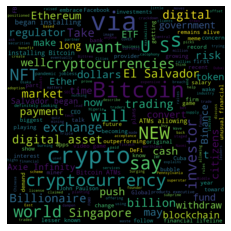

In [41]:
#plot Wordcloud

allWords = ''.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 1000 , height = 1000 , random_state=25 , max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [45]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,A Los Angeles man pleads guilty to participati...,0.750000,0.000000,Neutral
1,": ""It's a phenomenon, I can't deny it, but equ...",0.250000,0.000000,Neutral
2,Chinese crypto miners who were forced to pull ...,0.075000,-0.075000,Negative
3,Binance must stop offering services regulated ...,0.500000,0.000000,Neutral
4,"Day traders are going all-in on NFTs, leaving ...",0.000000,0.000000,Neutral
...,...,...,...,...
95,"El Salvador began installing Bitcoin ATMs, all...",0.000000,0.000000,Neutral
96,: Traditional financial institutions will neve...,0.250000,-0.062500,Negative
97,"LATEST: Bitcoin tops the closely watched $50,0...",0.900000,0.500000,Positive
98,NEW: The Cal Golden Bears will play their home...,0.618182,0.312121,Positive


In [56]:
#positive tweets 

j=1
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) +')'+ sortedDF['Tweets'][i])
        print()
        j=j+1
    

1)Newly published research raises concerns about the biggest digital token sale on record 

2)BREAKING: Singapore’s financial regulator says Binance may be in breach of the payment services act for soliciting business without an appropriate license  

3)Surging demand for NFTs and DeFi apps is allowing backers of Ethereum to dampen the cacophony of Bitcoin maximalists who have long claimed that only the original cryptocurrency matters  

4)Surging demand for NFTs and DeFi apps is allowing Ethereum to dampen the cacophony of Bitcoin maximalists who have long claimed that only the original cryptocurrency matters   

5): NEW COVER: Our Cities Issue

The guy behind  plans to build the world’s best city, save capitalism, and not…

6)Cathie Wood is getting ready to debut a new exchange-traded fund focused on transparency 

7)The NFT mania is reaching fever pitch on Twitter, the main hangout of crypto enthusiasts, where users are trading stories of expensive purchases and huge returns 

8)Val

In [63]:
#Negative Tweets 

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')

for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) +')'+ sortedDF['Tweets'][i])
        print()
        j=j+1
    


1)Chinese crypto miners who were forced to pull the plug on their energy-hungry machines following a government crackdown may have already begun the process of turning them back on overseas 

2)The SEC is suing the founder of BitConnect for an alleged $2 billion crypto scheme 

3)On this Odd Lots: Joe and Tracy discuss the future of DeFi with Solana founder  and  of Jump Trading  $SOL

4): Billionaire investor John Paulson says cryptocurrencies are a bubble that will “eventually prove to be worthless” 

5): Cryptocurrencies are a bubble that will "eventually prove to be worthless," billionaire investor John Paulson says 

6)The IMF raised doubts about El Salvador's Bitcoin embrace. Investors now show little concern  via 

7)A Pennsylvania Bitcoin miner is burning waste coal and getting government subsidies to do it  via 

8)A Pennsylvania Bitcoin miner is burning waste coal and getting government subsidies to do it  via 

9)The IMF raised doubts about El Salvador's Bitcoin embrace. Inv

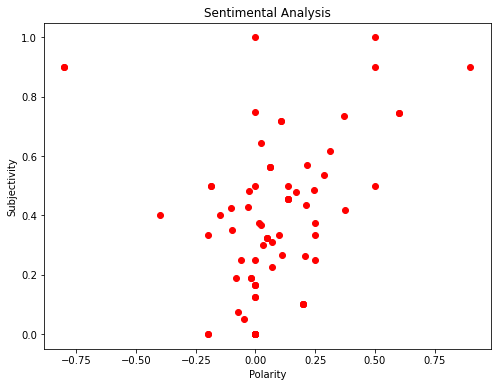

In [68]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i] , color ='Red')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [73]:
#Tweets in %

ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']
print('Positive Tweets')
round( ( ptweets.shape[0] / df.shape[0]) * 100 , 1)



Positive Tweets


43.0

In [75]:
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['Tweets']
print('Negative Tweets')

round( ( ntweets.shape[0] / df.shape[0]) * 100 , 1)


Negative Tweets


19.0

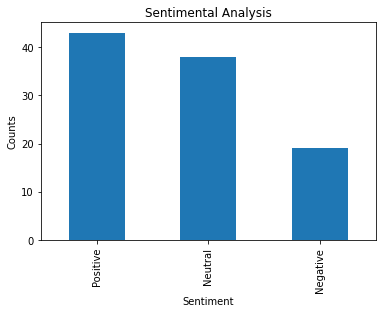

In [78]:
df['Analysis'].value_counts()

plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()

